Name: Donal Devine

Student ID: 21248745

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn import metrics
from sklearn.metrics import silhouette_score
from itertools import cycle
from yellowbrick.cluster import SilhouetteVisualizer # pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer


In [2]:
df = pd.read_csv("./loans_train_prepared.csv")



In [3]:
df.describe()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
count  614.000000       614.000000  614.000000        614.000000   
mean     0.248100         0.916588    1.076222          0.713355   
std      0.336541         0.412366    0.338744          0.134226   
min      0.000000         0.004634    0.005026          0.025000   
25%      0.000000         0.662440    0.883668          0.750000   
50%      0.000000         0.815365    1.047319          0.750000   
75%      0.333333         1.078246    1.229571          0.750000   
max      1.000000         3.357480    2.461145          1.000000   

       Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
count      614.000000   614.000000  614.000000   614.000000   614.000000   
mean         0.855049     0.796417    0.021173     0.648208     0.004886   
std          0.352339     0.402991    0.144077     0.477919     0.069786   
min          0.000000     0.000000    0.000000     0.000000     0.000000   
25%          1.000000     1.000000    0.000000     0.000000     0.000000   
50%          1.000000     1.000000    0.000000     1.000000     0.000000   
75%          1.000000     1.000000    0.000000     1.000000     0.000000   
max          1.000000     1.000000    1.000000     1.000000     1.000000   

       Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
count         614.000000         614.000000              614.000000   
mean            0.133550           0.052117                0.218241   
std             0.340446           0.222445                0.413389   
min             0.000000           0.000000                0.000000   
25%             0.000000           0.000000                0.000000   
50%             0.000000           0.000000                0.000000   
75%             0.000000           0.000000                0.000000   
max             1.000000           1.000000                1.000000   

       Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
count               614.000000           614.000000     614.000000   
mean                  0.379479             0.328990       0.687296   
std                   0.485653             0.470229       0.463973   
min                   0.000000             0.000000       0.000000   
25%                   0.000000             0.000000       0.000000   
50%                   0.000000             0.000000       1.000000   
75%                   1.000000             1.000000       1.000000   
max                   1.000000             1.000000       1.000000   

       TotalIncome  
count   614.000000  
mean      0.862686  
std       0.428068  
min       0.005599  
25%       0.597383  
50%       0.783902  
75%       1.035796  
max       3.207353

In [4]:
# Rescale the Data
Y = df['Loan_Status_Y']

df = df.drop('Loan_Status_Y', axis=1, errors='ignore') 
data = np.array(df.values, dtype = float)
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

print(f'(number of examples, number of attributes): {data.shape}')


(number of examples, number of attributes): (614, 15)


## Task 2

 
* Plot the sum of squared distances from the data points to the centers of the k-means clusters for various values of k. 
* Use the Elbow method to pick the best value of k. 
* Attempt also another method for determining the best value of k. 
* Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means. 
* Aim at producing meaningful clustering.
* Use at least two different methods for visualising the clustering. 
* Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).

##### Plot the sum of squared distances from the data points to the centers of the k-means clusters for various values of k. 

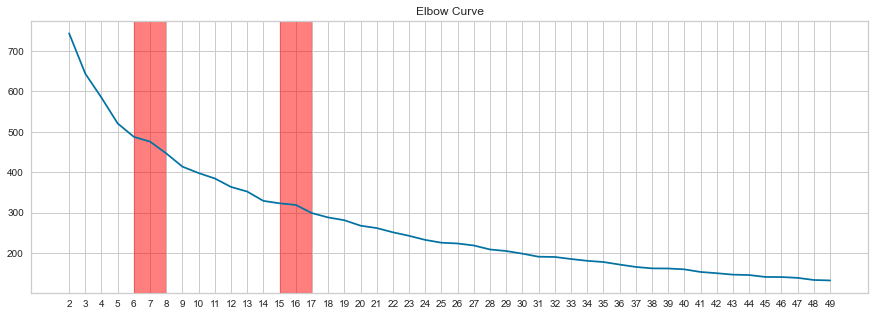

In [6]:
ks = range(2, 50)

wcss_list = []

for x in ks:
    clustered_data = cluster.KMeans(n_clusters=x, n_init=10, max_iter=300, random_state=42).fit(data)
    current_wcss = clustered_data.inertia_  # Inertia = Sum of distances 
    wcss_list.append(current_wcss)

fig = plt.figure(figsize=(15, 5))
plt.plot(ks, wcss_list)
plt.grid(True)
plt.xticks(ks)
plt.title('Elbow Curve')
plt.axvspan(6, 8, color='red', alpha=0.5)
plt.axvspan(15, 17, color='red', alpha=0.5)
plt.show()

##### Use the Elbow method to pick the best value of k. 

I can see an elbow at 7 and one at 16.

##### Attempt also another method for determining the best value of k.

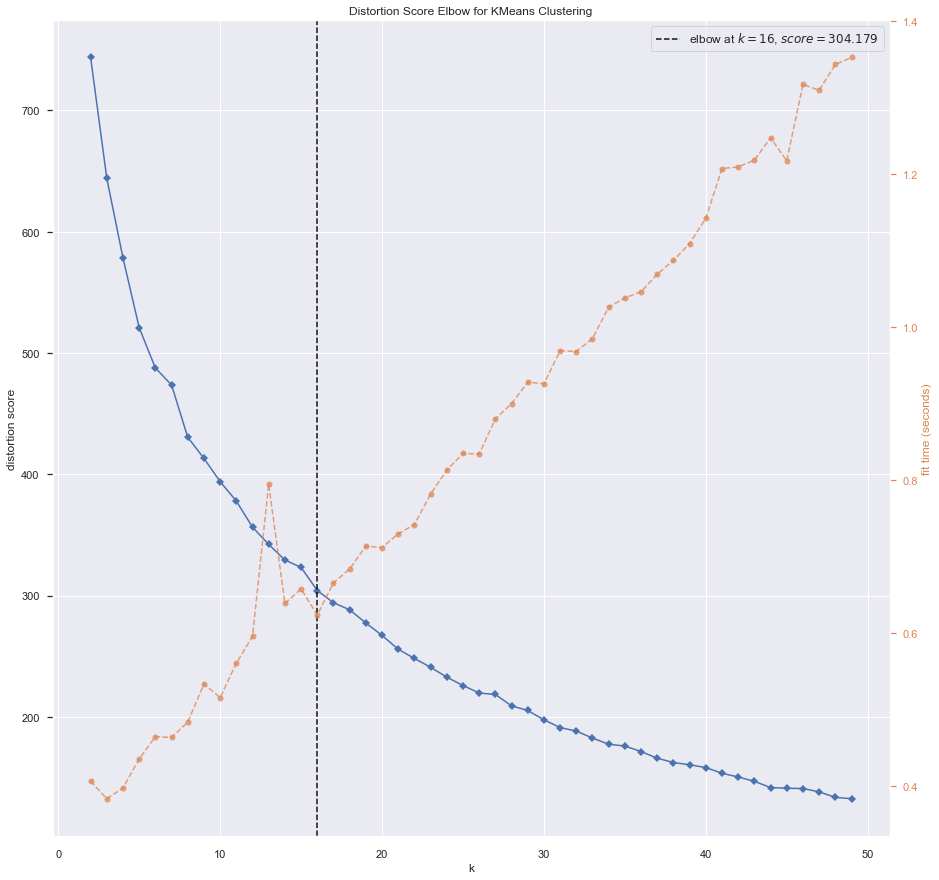

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
km = cluster.KMeans(n_clusters=8, n_init=30, max_iter=500, random_state=42).fit(data)
visualizer = KElbowVisualizer(km, k=(2,50), locate_elbow=True)
 
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Conclusion: Using the KElbowVisualizer, I got an optimal k value of 16.

##### Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means. 

In [40]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

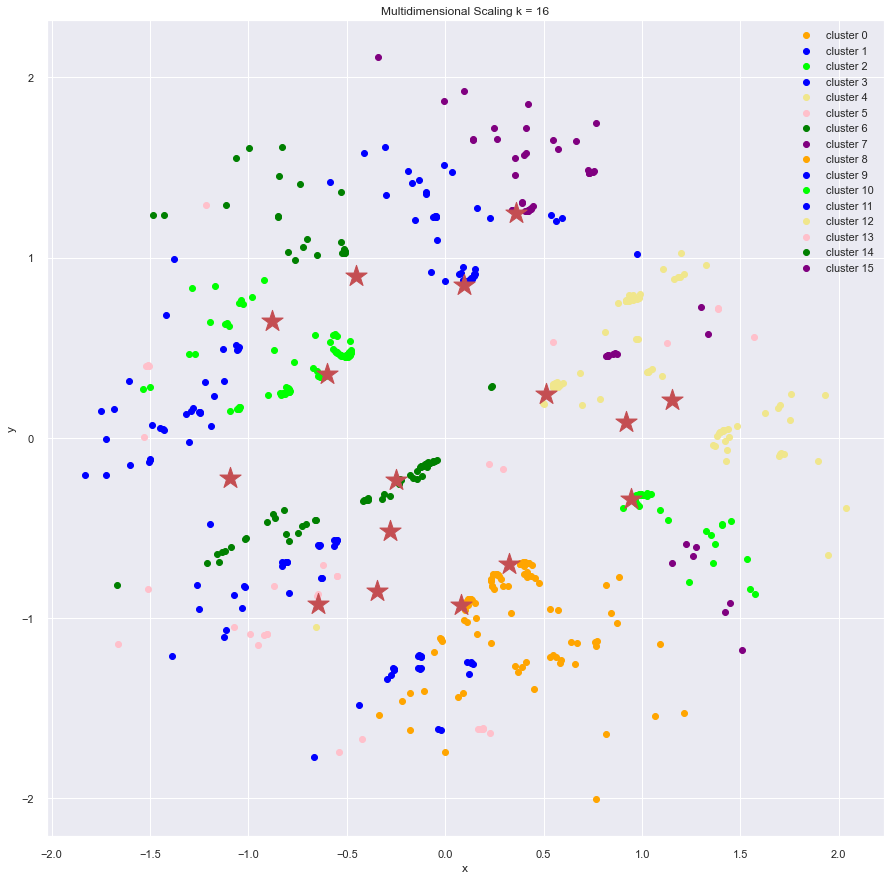

In [47]:
optimal_k_value = 16

optimal_k_means = cluster.KMeans(n_clusters = optimal_k_value, n_init = 10, max_iter = 300, random_state = 42).fit(data)

data_with_clusters = np.r_[data, optimal_k_means.cluster_centers_]

scaled_md5 = manifold.MDS(n_components=2, random_state = 42).fit_transform(data_with_clusters)

clustering_scatterplot(points=scaled_md5[:-optimal_k_value, :], labels=optimal_k_means.labels_, centers=scaled_md5[-optimal_k_value:, :], title='Multidimensional Scaling k = ' + str(optimal_k_value))




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


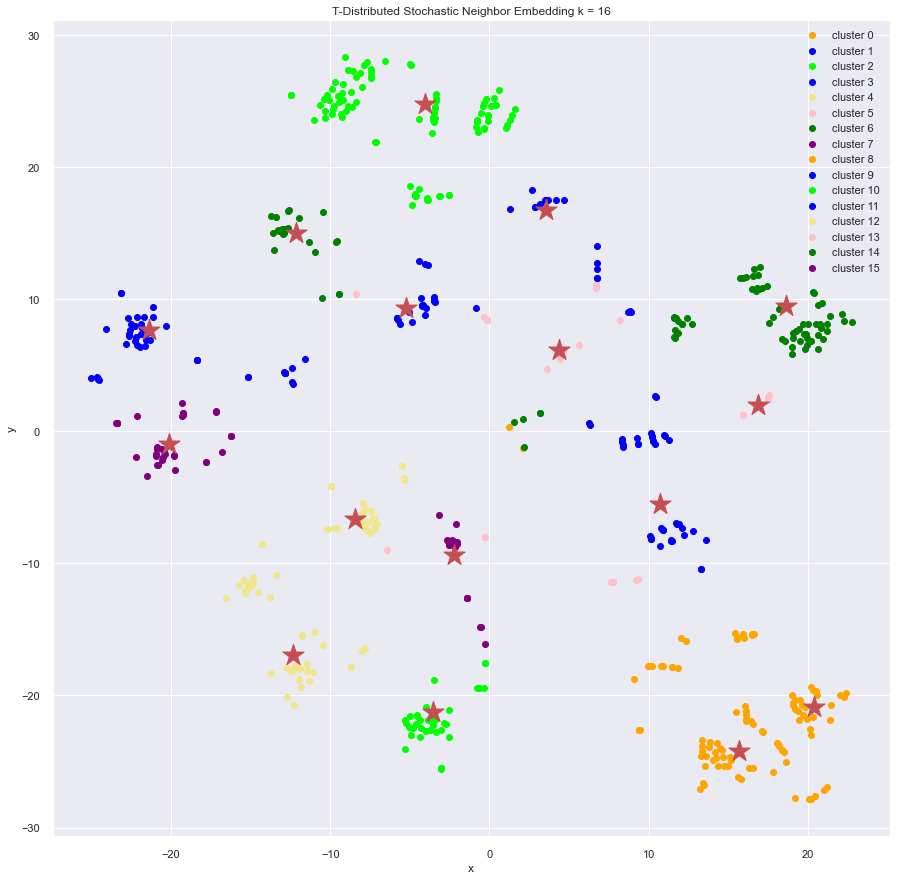

In [48]:
optimal_k_value = 16

scaled_tsne = manifold.TSNE(n_components = 2).fit_transform(data_with_clusters)

clustering_scatterplot(points=scaled_tsne[:-optimal_k_value, :], labels=optimal_k_means.labels_, centers=scaled_tsne[-optimal_k_value:, :], title='T-Distributed Stochastic Neighbor Embedding k = ' + str(optimal_k_value))

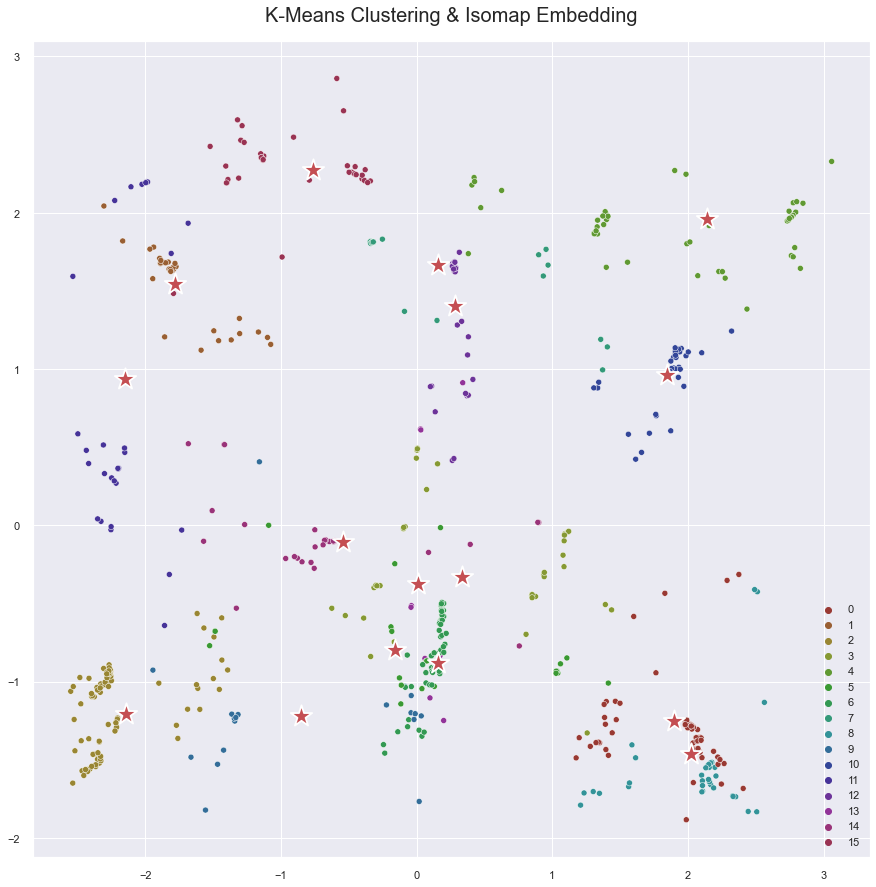

In [37]:
k = 16
model = cluster.KMeans(n_clusters = k, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 42)
model_data = model.fit(data)
centroids = model_data.cluster_centers_
labels = model_data.labels_
data_and_centres = np.r_[data, centroids]
isomap_embedding_model = manifold.Isomap(n_components = 2, n_neighbors = 14)
embedded_data_and_centroids = isomap_embedding_model.fit_transform(data_and_centres)
embedded_data = embedded_data_and_centroids[:-k,:]
embedded_centroids = embedded_data_and_centroids[-k:,:]
sns.set(rc={"figure.figsize":(15,15)})
palette = sns.hls_palette(16, l=0.4, s=0.5)
sns.scatterplot(x=embedded_data[:,0], y=embedded_data[:,1], hue=labels, legend='full', palette=palette)
sns.scatterplot(x=embedded_centroids[:,0], y=embedded_centroids[:,1], color="r", s=500, marker="*")
plt.title("K-Means Clustering & Isomap Embedding", pad=20, fontdict={'fontsize':20})
plt.show()


NameError: name 'TSNE' is not defined

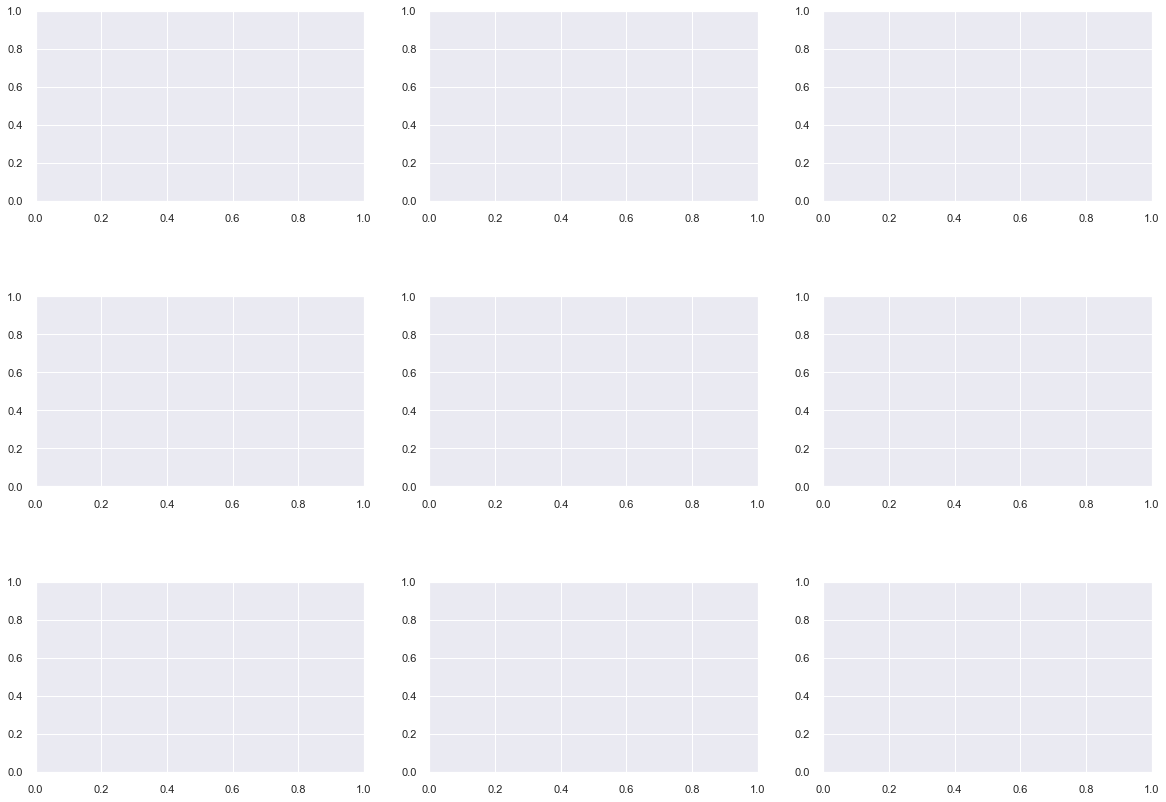

In [13]:
# Using t-SNE for dimensionality reduction - tune the perplexity hyperparameter

perplexity_list = [10,20,30,40,50,60,70,80,90]

fig, ax = plt.subplots(3,3,figsize = (20,14))
plt.subplots_adjust(hspace=0.5)

# tune the perplexity hyperparameter

for i, perplexity in enumerate(perplexity_list):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    tsne_fit = tsne.fit_transform(data)

    ax[i%3][math.floor(i/3)].set_title(f'Perplexity {perplexity}')
    ax[i%3][math.floor(i/3)].scatter(tsne_fit[:,0], tsne_fit[:,1], color='black', alpha=0.5)

In [ ]:
# Using DBSCAN we have 2 hyper-parameters worth considering
# eps - sets the radius that a cluster can look for neighbour points
# min_samp defines the min number of points within the eps range required to qualify as a cluster

model = DBSCAN(eps=3, min_samples=5).fit(data)

# Extracting the centroids from the fitted data within the model - before dimensionality reduction
centroids = model_data.cluster_centers_
# Extracting the labels from the fitted data within the model - before dimensionality reduction
labels = model_data.labels_
# Appending the centroids to the original dataset
data_and_centres = np.r_[data, centroids]

tsne = TSNE(n_components=2, perplexity=70)
embedded_data_and_centroids = tsne.fit_transform(data_and_centres)

embedded_data = embedded_data_and_centroids[:-k,:]
embedded_centroids = embedded_data_and_centroids[-k:,:]

In [ ]:
# Graphing our output
sns.set(rc={"figure.figsize":(15,15)})
palette = sns.hls_palette(len(set(labels)), l=0.4, s=1.0)
sns.scatterplot(x=embedded_data[:,0], y=embedded_data[:,1], hue=labels, legend='full', palette=palette)
sns.scatterplot(x=embedded_centroids[:,0], y=embedded_centroids[:,1], color="#2f4d61", s=200, marker="o", alpha=1, edgecolor='k')
plt.title("DBSCAN Clustering with TSNE Embedding", pad=20, fontdict={'fontsize':20})
plt.show()

 Task 3 - Affinity Propagation Clustering

In [ ]:
aff_prop = AffinityPropagation(damping = 0.75,max_iter=500, random_state=random_num).fit(data) 
afprop_centers_indices = aff_prop.cluster_centers_indices_ #indices of cluster centers
afprop_centers = aff_prop.cluster_centers_ #cluster centers
afprop_label = aff_prop.labels_ #assigns cluster # label to each data point
afpropopt = len(afprop_centers_indices) # number of clusters
data_and_centers = np.r_[data, aff_prop.cluster_centers_]
print('Number of clusters: ',afpropopt)